# LeNet_5 trained on MNIST dataset

In [1]:
import torch
import torch.nn as nn
from torchvision import transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import sys

In [2]:
# Load MNIST 
trainset = datasets.MNIST(root='./data', train=True, download=True, 
                      transform=transforms.Compose([transforms.ToTensor(),transforms.Pad(2)]))
testset = datasets.MNIST(root='./data', train=False, download=True, 
                      transform=transforms.Compose([transforms.ToTensor(),transforms.Pad(2)]))

In [3]:
# Separate MNIST dataset into Training/Testing
batch_size=128

in_channels = testset[0][0].shape[0]

train_size = trainset.__len__()
test_size = testset.__len__()


trainloader = DataLoader(trainset, 
                          batch_size = batch_size, 
                          shuffle = True, 
                          num_workers = 1)

testloader = DataLoader(testset, 
                        batch_size = 5000, 
                        shuffle = False, 
                        num_workers = 1)

In [4]:
for images, labels in trainloader:
    print(images.shape)  # This will print the size of the images in the batch
    break  # We only need to inspect the first batch

torch.Size([128, 1, 32, 32])


In [5]:
#Classes presented in the dataset
class_names = trainset.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

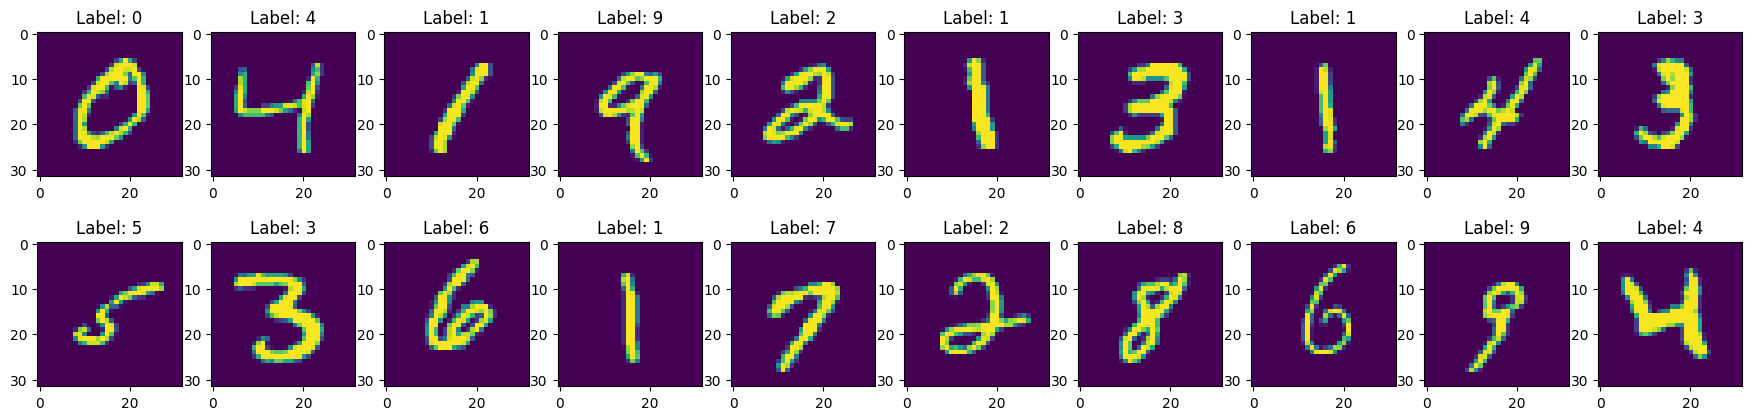

In [6]:
#  See some MNIST images
fig = plt.figure(figsize=(22, 5))
rows, cols = 2, 10

for i in range(1, (rows*cols) + 1):
    img = transforms.ToPILImage(mode="L")(trainset[i][0])
    fig.add_subplot(rows, cols, i)
    plt.title(f"Label: {trainset[i][1]}")
    plt.imshow(img)
plt.show()

In [7]:
class LeNet_5(nn.Module):

  def __init__(self, in_channels = 1):
    super().__init__()
 
    self.tanh = nn.Tanh()
    self.c1 = nn.Conv2d(in_channels,6,kernel_size=5, stride=1, padding=0)
    self.s2 = nn.AvgPool2d(kernel_size=2, stride=2)

    self.c3_0 = nn.Conv2d(3,1,kernel_size=5,stride=1)
    self.c3_1 = nn.Conv2d(3,1,kernel_size=5,stride=1)
    self.c3_2 = nn.Conv2d(3,1,kernel_size=5,stride=1)
    self.c3_3 = nn.Conv2d(3,1,kernel_size=5,stride=1)
    self.c3_4 = nn.Conv2d(3,1,kernel_size=5,stride=1)
    self.c3_5 = nn.Conv2d(3,1,kernel_size=5,stride=1)
    self.c3_6 = nn.Conv2d(4,1,kernel_size=5,stride=1)
    self.c3_7 = nn.Conv2d(4,1,kernel_size=5,stride=1)
    self.c3_8 = nn.Conv2d(4,1,kernel_size=5,stride=1)
    self.c3_9 = nn.Conv2d(4,1,kernel_size=5,stride=1)
    self.c3_10 = nn.Conv2d(4,1,kernel_size=5,stride=1)
    self.c3_11 = nn.Conv2d(4,1,kernel_size=5,stride=1)
    self.c3_12 = nn.Conv2d(4,1,kernel_size=5,stride=1)
    self.c3_13 = nn.Conv2d(4,1,kernel_size=5,stride=1)
    self.c3_14 = nn.Conv2d(4,1,kernel_size=5,stride=1)
    self.c3_15 = nn.Conv2d(6,1,kernel_size=5,stride=1)

    self.s4 = nn.AvgPool2d(kernel_size=2, stride=2)

    self.c5 = nn.Conv2d(16,120,kernel_size=5,stride=1)
    
    self.l1 = nn.Linear(120,84)
    self.l2 = nn.Linear(84,10)

    self.tanh = nn.Tanh()
    
  


  def forward(self,x):

    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    dim = x.shape[0]
    out = self.c1(x)
    out = self.tanh(out)
    out = self.s2(out)

    basket = torch.zeros((dim,16,10,10)).to(device)
    
    basket[:,0,:,:] = self.c3_0(out[:,[0,1,2],:,:])[:,0,:,:]
    basket[:,1,:,:] = self.c3_1(out[:,[1,2,3],:,:])[:,0,:,:]
    basket[:,2,:,:] = self.c3_2(out[:,[2,3,4],:,:])[:,0,:,:]
    basket[:,3,:,:] = self.c3_3(out[:,[3,4,5],:,:])[:,0,:,:]
    basket[:,4,:,:] = self.c3_4(out[:,[0,4,5],:,:])[:,0,:,:]
    basket[:,5,:,:] = self.c3_5(out[:,[0,1,5],:,:])[:,0,:,:]
    basket[:,6,:,:] = self.c3_6(out[:,[0,1,2,3],:,:])[:,0,:,:]
    basket[:,7,:,:] = self.c3_7(out[:,[1,2,3,4],:,:])[:,0,:,:]
    basket[:,8,:,:] = self.c3_8(out[:,[2,3,4,5],:,:])[:,0,:,:]
    basket[:,9,:,:] = self.c3_9(out[:,[0,3,4,5],:,:])[:,0,:,:]
    basket[:,10,:,:] = self.c3_10(out[:,[0,1,4,5],:,:])[:,0,:,:]
    basket[:,11,:,:] = self.c3_11(out[:,[0,1,2,5],:,:])[:,0,:,:]
    basket[:,12,:,:] = self.c3_12(out[:,[0,1,3,4],:,:])[:,0,:,:]
    basket[:,13,:,:] = self.c3_13(out[:,[1,2,4,5],:,:])[:,0,:,:]
    basket[:,14,:,:] = self.c3_14(out[:,[0,2,3,5],:,:])[:,0,:,:]
    basket[:,15,:,:] = self.c3_15(out)[:,0,:,:]
    
    out = basket
    out = self.tanh(out)
    out = self.s4(out)
    out = self.c5(out)

    temp = torch.zeros(dim,120).to(device)

    for idx in range(dim):
      temp[idx,:] = out[idx,:,0,0]
    
    out = temp
    out = self.tanh(out)
    out = self.l1(out)
    out = self.tanh(out)
    out = self.l2(out)

    return out


In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using: {device}')

Using: cpu


In [9]:
optimizer = torch.optim.Adam 
start_lr = 1e-3 
epochs = 20

loss_fn = torch.nn.CrossEntropyLoss()

In [10]:
import gc

class Trainer():
  def __init__(self, net):
    self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
    self.net = net


  def _train_epoch(self, trainloader, optimizer, loss_fn, 
                   retitrain = False):
    
    loss_basket = 0
    n_batches = len(trainloader)

    for i, data in enumerate(trainloader):
      batch, labels = data
      batch, labels = batch.to(self.device), labels.to(self.device)

      self.net.train()
      out = self.net(batch)
      loss = loss_fn(out, labels)
      optimizer.zero_grad()
      loss.backward()

      if retitrain:
        # here we keep setting to 0 the grads of specific color
        # interactions (rk = retina kernel)
        rk_size = self.net.retina.conv.weight[0,0].shape[0]
        for i, cube in enumerate(self.net.retina.conv.weight.grad):
            if i != 2:
                cube.data[2] = torch.zeros(1,rk_size,rk_size)
            else:
                cube.data[:2] = torch.zeros(2,rk_size,rk_size)

      optimizer.step()

      loss_basket += loss

    return loss_basket/n_batches


  def _valid_epoch(self, validloader, optimizer, loss_fn):

    n_batches = len(validloader)
    v_loss_basket = 0
    v_accuracy_basket = 0

    self.net.eval()

    # Possible fix for running out of memory!
    # with torch.no_grad():
    for v_batch, v_labels in validloader:

      v_batch, v_labels = v_batch.to(self.device), v_labels.to(self.device)
      out = self.net(v_batch)

      v_loss_basket += loss_fn(out, v_labels)
      v_accuracy_basket += (out.argmax(axis=1)==v_labels).sum()/len(v_labels)

    return v_loss_basket/n_batches, v_accuracy_basket/n_batches




  def train(self, trainloader, validloader, optimizer, loss_fn,
            epochs, retitrain = False, plotting = False):
    
    losses = []
    v_losses = []
    v_accs = []

    for t in range(epochs):
      
      # train epoch
      gc.collect()
      loss = self._train_epoch(trainloader, optimizer, loss_fn,
                               retitrain = retitrain)
      # valid epoch
      gc.collect()
      vloss, vacc = self._valid_epoch(validloader, optimizer, loss_fn)

      # gather the data for plotting
      losses.append(loss.cpu().detach().numpy())
      v_losses.append(vloss.cpu().detach().numpy())
      v_accs.append(vacc.cpu().detach().numpy())

      completed = (t*100)//epochs
      print(f"Training {completed}%: \t loss {loss:.5f}\t v_loss {vloss:.5f},\t v_acc {vacc:.5f}")


    if plotting: 
      x = range(len(losses))

      fig = plt.figure(figsize=(10,5))
      fig.add_subplot(1,2,1)
      plt.plot(x,losses, label="Training loss")
      plt.plot(x,v_losses, label="Validation loss")
      plt.xlabel("Epochs")
      plt.legend()
      fig.add_subplot(1,2,2)
      plt.plot(x,v_accs, label="Validation accuracy")
      plt.xlabel("Epochs")
      plt.legend()
      plt.show()

    print("Training complete.")
    

In [11]:
model = LeNet_5().to(device)
model_save_name = "LeNet_5"

optimizer = optimizer(model.parameters(), lr=start_lr)

print(model)

trainer = Trainer(model)

LeNet_5(
  (tanh): Tanh()
  (c1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (s2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (c3_0): Conv2d(3, 1, kernel_size=(5, 5), stride=(1, 1))
  (c3_1): Conv2d(3, 1, kernel_size=(5, 5), stride=(1, 1))
  (c3_2): Conv2d(3, 1, kernel_size=(5, 5), stride=(1, 1))
  (c3_3): Conv2d(3, 1, kernel_size=(5, 5), stride=(1, 1))
  (c3_4): Conv2d(3, 1, kernel_size=(5, 5), stride=(1, 1))
  (c3_5): Conv2d(3, 1, kernel_size=(5, 5), stride=(1, 1))
  (c3_6): Conv2d(4, 1, kernel_size=(5, 5), stride=(1, 1))
  (c3_7): Conv2d(4, 1, kernel_size=(5, 5), stride=(1, 1))
  (c3_8): Conv2d(4, 1, kernel_size=(5, 5), stride=(1, 1))
  (c3_9): Conv2d(4, 1, kernel_size=(5, 5), stride=(1, 1))
  (c3_10): Conv2d(4, 1, kernel_size=(5, 5), stride=(1, 1))
  (c3_11): Conv2d(4, 1, kernel_size=(5, 5), stride=(1, 1))
  (c3_12): Conv2d(4, 1, kernel_size=(5, 5), stride=(1, 1))
  (c3_13): Conv2d(4, 1, kernel_size=(5, 5), stride=(1, 1))
  (c3_14): Conv2d(4, 1, kernel_size=(5, 5), stri

Training 0%: 	 loss 0.39692	 v_loss 0.16196,	 v_acc 0.95110
Training 20%: 	 loss 0.13102	 v_loss 0.09322,	 v_acc 0.97130
Training 40%: 	 loss 0.08509	 v_loss 0.07739,	 v_acc 0.97520
Training 60%: 	 loss 0.06521	 v_loss 0.07079,	 v_acc 0.97600
Training 80%: 	 loss 0.05043	 v_loss 0.06034,	 v_acc 0.98040


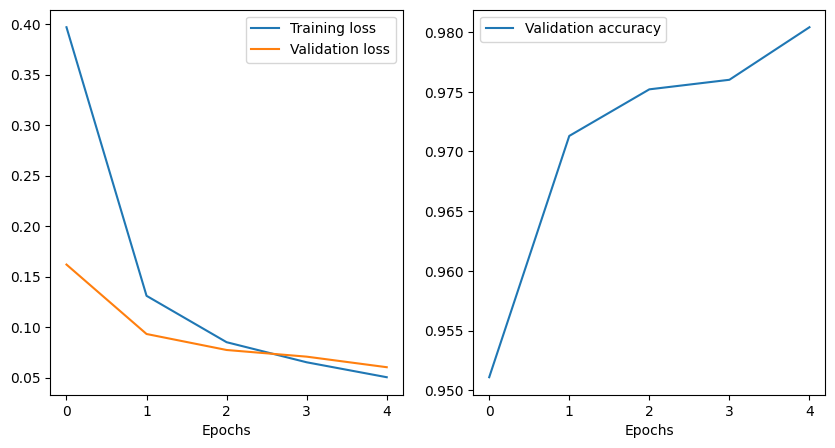

Training complete.


In [12]:
import gc
gc.collect()

trainer.train(trainloader = trainloader,
              validloader = testloader,
              optimizer = optimizer,
              loss_fn = loss_fn,
              epochs = 5,
              plotting = True)

In [13]:
results = []
total = 0
correct = 0
with torch.no_grad():
    for itr, (image, label) in enumerate(testloader):
        if torch.cuda.is_available():
            image = image.cuda()
            label = label.cuda()

        pred = model(image)
        pred = torch.nn.functional.softmax(pred, dim=1)

        # Accumulate the correct predictions
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                correct += 1
                results.append((image[i], torch.max(p.data, 0)[1]))

In [14]:
# Calculate test accuracy
test_accuracy = correct / len(testset)
print('Test accuracy: {:.8f}'.format(test_accuracy))

Test accuracy: 0.98040000


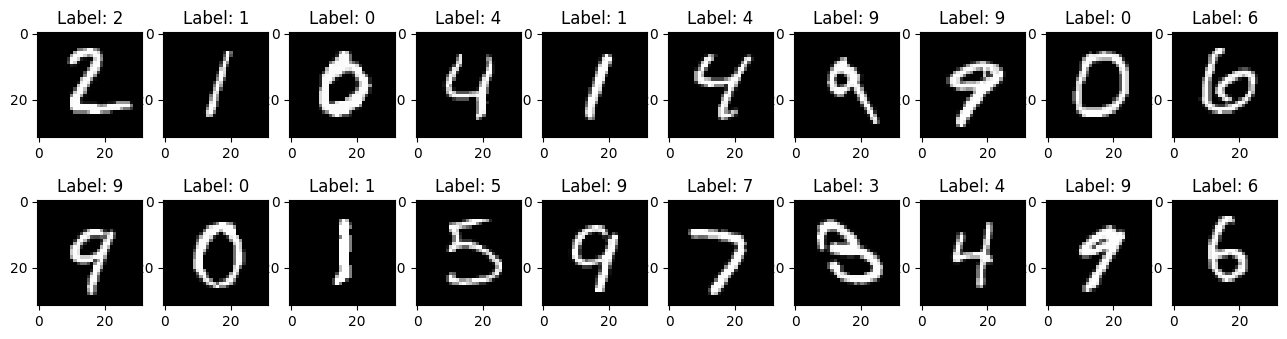

In [15]:
fig = plt.figure(figsize=(16, 4))
rows, cols = 2, 10

for i in range(1, (rows*cols) + 1):
    img = results[i][0].squeeze(0).detach().cpu()  # Get the image tensor
    img = transforms.ToPILImage(mode="L")(img)
    fig.add_subplot(rows, cols, i)
    plt.title(f"Label: {results[i][1].item()}")
    plt.imshow(img, cmap='gray')  # Use cmap for grayscale
plt.show()

# Occluded MNIST dataset

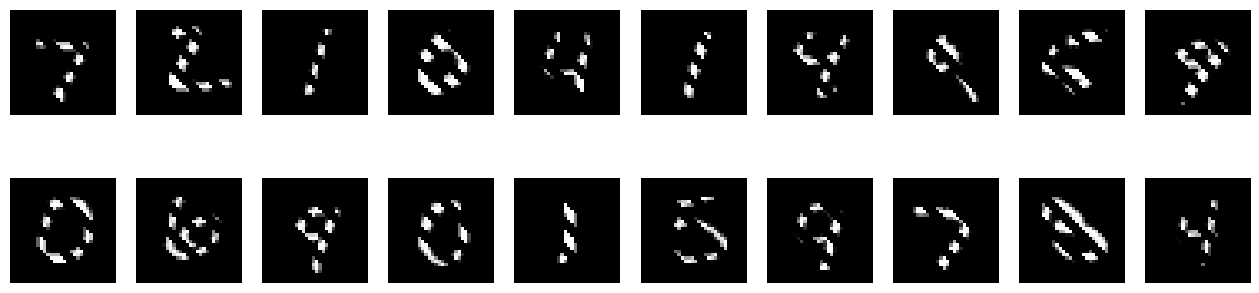

In [16]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

def apply_anti_diagonal_occlusion(image, stripe_width=4, stripe_spacing=4):
    """
    Apply anti-diagonal occlusion (bottom-left to top-right stripes) on a single image.
    :param image: Torch tensor (1, 32, 32) for MNIST image
    :param stripe_width: Width of each stripe
    :param stripe_spacing: Distance between stripes
    :return: Occluded image
    """
    image = image.clone()
    _, h, w = image.shape
    
    for i in range(-h, w, stripe_width + stripe_spacing):
        for j in range(stripe_width):
            x_indices = torch.arange(max(0, -i), min(h, w - i))
            y_indices = x_indices + i + j
            valid_mask = (y_indices >= 0) & (y_indices < w)
            image[0, x_indices[valid_mask], y_indices[valid_mask]] = 0  # Set occluded pixels to 0
    
    return image

# Load MNIST and apply occlusion
mnist_testset = MNIST(root='./data', train=False, download=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Pad(2)]))
occluded_images = []
labels = []

for i in range(5000):  # Taking 5000 MNIST images
    img, label = mnist_testset[i]
    occluded_img = apply_anti_diagonal_occlusion(img, stripe_width=4, stripe_spacing=4)
    occluded_images.append(occluded_img)
    labels.append(label)

# Convert to tensor dataset
test_images = torch.stack(occluded_images)
test_labels = torch.tensor(labels)

test_dataset = torch.utils.data.TensorDataset(test_images, test_labels)
test_loader = DataLoader(test_dataset, batch_size=5000, shuffle=False)

# Visualize some occluded images
fig, axes = plt.subplots(2, 10, figsize=(16, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i].squeeze(), cmap='gray')
    ax.axis('off')
plt.show()


# Evaluating the model on different Occluded Datasets

In [17]:
# Assuming 'model' is trained LeNet_5 model
torch.save(model.state_dict(), "LeNet_5.pth")

In [18]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

# Function to apply anti-diagonal occlusion
def apply_anti_diagonal_occlusion(image, stripe_width=4, stripe_spacing=4):
    image = image.clone()
    _, h, w = image.shape
    
    for i in range(-h, w, stripe_width + stripe_spacing):
        for j in range(stripe_width):
            x_indices = torch.arange(max(0, -i), min(h, w - i))
            y_indices = x_indices + i + j
            valid_mask = (y_indices >= 0) & (y_indices < w)
            image[0, x_indices[valid_mask], y_indices[valid_mask]] = 0  # Set occluded pixels to 0
    
    return image

# Load MNIST and apply occlusion
mnist_testset = MNIST(root='./data', train=False, download=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Pad(2)]))

# Generate occlusion configurations dynamically: (width, spacing) from 1 to 10
occlusion_configs = [(w, s) for w in range(1, 11) for s in range(1, 11)]
results = []

# Load the trained LeNet-5 model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = LeNet_5().to(device)
model.load_state_dict(torch.load("LeNet_5.pth", map_location=device))
model.eval()

# Evaluate LeNet-5 on occluded MNIST for different occlusion configurations
for stripe_width, stripe_spacing in occlusion_configs:
    occluded_images = []
    labels = []
    
    for i in range(5000):  # Taking 5000 MNIST images
        img, label = mnist_testset[i]
        occluded_img = apply_anti_diagonal_occlusion(img, stripe_width, stripe_spacing)
        occluded_images.append(occluded_img)
        labels.append(label)
    
    # Convert to tensor dataset
    test_images = torch.stack(occluded_images)
    test_labels = torch.tensor(labels)
    test_dataset = torch.utils.data.TensorDataset(test_images, test_labels)
    test_loader = DataLoader(test_dataset, batch_size=5000, shuffle=False)
    
    # Test accuracy
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            predictions = torch.argmax(outputs, dim=1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)
    
    accuracy = correct / total
    results.append((stripe_width, stripe_spacing, accuracy))
    print(f"Occlusion (Width={stripe_width}, Spacing={stripe_spacing}) -> Accuracy: {accuracy:.4f}")


C:\Users\Aneeqa\AppData\Local\Temp\ipykernel_34904\1869814869.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("LeNet_5.pth", map_locati

Occlusion (Width=1, Spacing=1) -> Accuracy: 0.9700
Occlusion (Width=1, Spacing=2) -> Accuracy: 0.9712
Occlusion (Width=1, Spacing=3) -> Accuracy: 0.9710
Occlusion (Width=1, Spacing=4) -> Accuracy: 0.9722
Occlusion (Width=1, Spacing=5) -> Accuracy: 0.9704
Occlusion (Width=1, Spacing=6) -> Accuracy: 0.9702
Occlusion (Width=1, Spacing=7) -> Accuracy: 0.9694
Occlusion (Width=1, Spacing=8) -> Accuracy: 0.9700
Occlusion (Width=1, Spacing=9) -> Accuracy: 0.9696
Occlusion (Width=1, Spacing=10) -> Accuracy: 0.9696
Occlusion (Width=2, Spacing=1) -> Accuracy: 0.9558
Occlusion (Width=2, Spacing=2) -> Accuracy: 0.9628
Occlusion (Width=2, Spacing=3) -> Accuracy: 0.9628
Occlusion (Width=2, Spacing=4) -> Accuracy: 0.9608
Occlusion (Width=2, Spacing=5) -> Accuracy: 0.9546
Occlusion (Width=2, Spacing=6) -> Accuracy: 0.9544
Occlusion (Width=2, Spacing=7) -> Accuracy: 0.9422
Occlusion (Width=2, Spacing=8) -> Accuracy: 0.9594
Occlusion (Width=2, Spacing=9) -> Accuracy: 0.9552
Occlusion (Width=2, Spacing=10

# Accuracy Table

In [19]:
# Print results in tabular form
print("\nResults Table:")
print("Width | Spacing | Accuracy")
print("-------------------------")
for width, spacing, acc in results:
    print(f"{width:5} | {spacing:7} | {acc:.4f}")


Results Table:
Width | Spacing | Accuracy
-------------------------
    1 |       1 | 0.9700
    1 |       2 | 0.9712
    1 |       3 | 0.9710
    1 |       4 | 0.9722
    1 |       5 | 0.9704
    1 |       6 | 0.9702
    1 |       7 | 0.9694
    1 |       8 | 0.9700
    1 |       9 | 0.9696
    1 |      10 | 0.9696
    2 |       1 | 0.9558
    2 |       2 | 0.9628
    2 |       3 | 0.9628
    2 |       4 | 0.9608
    2 |       5 | 0.9546
    2 |       6 | 0.9544
    2 |       7 | 0.9422
    2 |       8 | 0.9594
    2 |       9 | 0.9552
    2 |      10 | 0.9448
    3 |       1 | 0.9052
    3 |       2 | 0.9314
    3 |       3 | 0.9168
    3 |       4 | 0.9000
    3 |       5 | 0.9124
    3 |       6 | 0.8514
    3 |       7 | 0.9176
    3 |       8 | 0.9112
    3 |       9 | 0.8590
    3 |      10 | 0.8874
    4 |       1 | 0.7984
    4 |       2 | 0.8530
    4 |       3 | 0.8088
    4 |       4 | 0.8146
    4 |       5 | 0.7580
    4 |       6 | 0.8130
    4 |       7 | 0.8060
    4 

# Results Plot

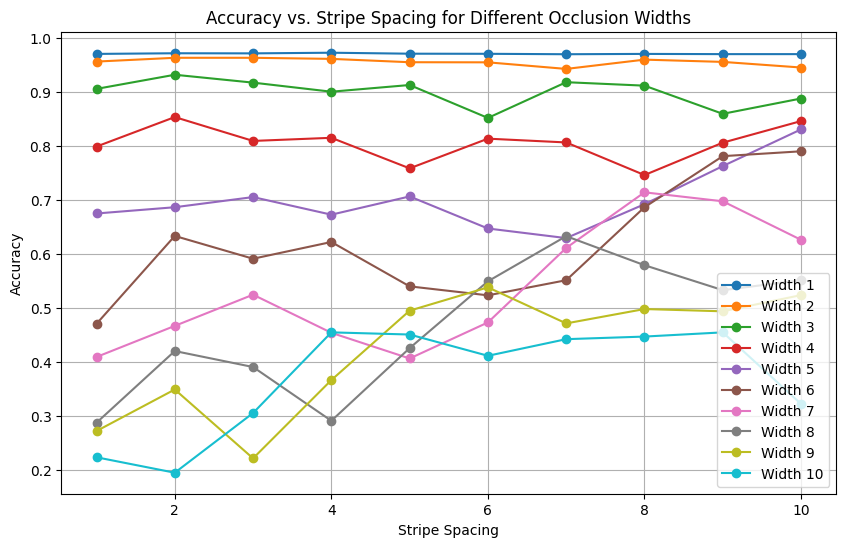

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Convert results to NumPy array
results = np.array(results)

# Get unique widths
widths = np.unique(results[:, 0])

# Plot accuracy vs. spacing for different widths
plt.figure(figsize=(10, 6))

for width in widths:
    subset = results[results[:, 0] == width]  # Get data for this width
    plt.plot(subset[:, 1], subset[:, 2], marker='o', linestyle='-', label=f'Width {int(width)}')

plt.xlabel('Stripe Spacing')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Stripe Spacing for Different Occlusion Widths')
plt.legend()
plt.grid(True)
plt.show()


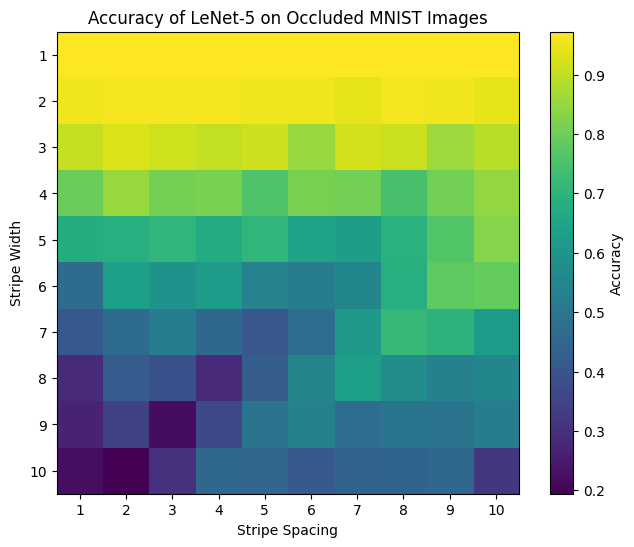

In [21]:
# Plotting the results
widths = [res[0] for res in results]
spacings = [res[1] for res in results]
accuracies = [res[2] for res in results]

# Creating a heatmap-like plot
accuracy_matrix = np.array(accuracies).reshape(10, 10)

plt.figure(figsize=(8, 6))
plt.imshow(accuracy_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label="Accuracy")
plt.xticks(np.arange(10), np.arange(1, 11))
plt.yticks(np.arange(10), np.arange(1, 11))
plt.xlabel('Stripe Spacing')
plt.ylabel('Stripe Width')
plt.title('Accuracy of LeNet-5 on Occluded MNIST Images')
plt.show()

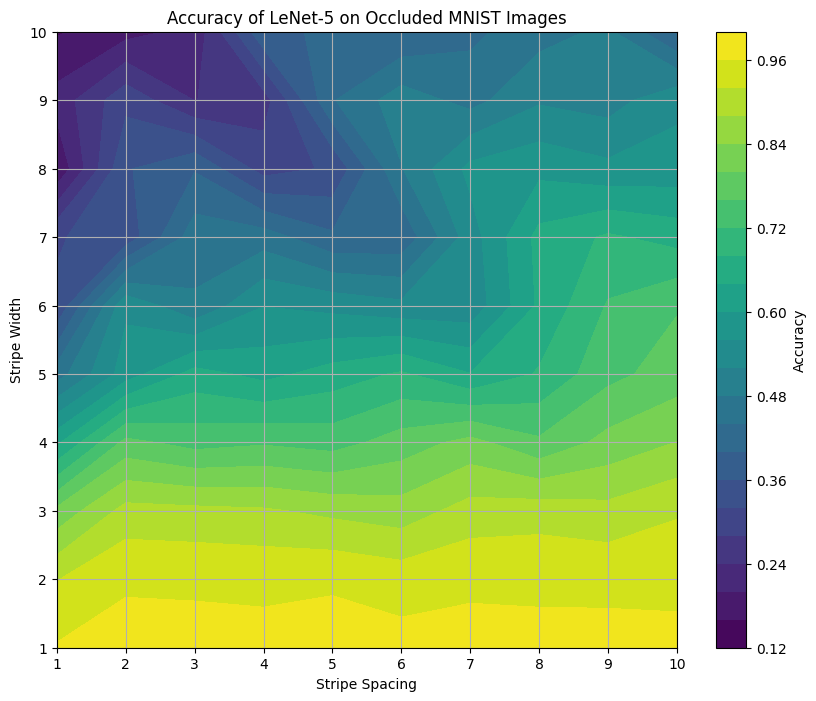

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the results table
widths = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
spacings = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Accuracy results (reshaped to fit the contour plot grid)
accuracies = np.array([
    [0.9636, 0.9706, 0.9720, 0.9716, 0.9702, 0.9730, 0.9700, 0.9704, 0.9714, 0.9734],
    [0.9184, 0.9562, 0.9544, 0.9520, 0.9568, 0.9438, 0.9546, 0.9528, 0.9516, 0.9478],
    [0.8102, 0.8944, 0.8906, 0.8854, 0.8700, 0.8576, 0.8966, 0.9026, 0.8924, 0.9160],
    [0.6318, 0.7720, 0.7446, 0.7548, 0.7430, 0.7786, 0.8132, 0.7670, 0.8132, 0.8408],
    [0.4608, 0.5798, 0.6556, 0.6268, 0.6578, 0.6854, 0.6412, 0.6842, 0.7482, 0.7788],
    [0.3240, 0.5522, 0.4856, 0.5586, 0.5464, 0.5298, 0.5318, 0.6468, 0.7236, 0.7566],
    [0.3176, 0.3338, 0.4624, 0.4600, 0.4074, 0.4088, 0.5412, 0.6522, 0.6860, 0.6644],
    [0.1650, 0.3558, 0.3964, 0.3026, 0.3258, 0.4780, 0.5710, 0.5890, 0.5700, 0.5758],
    [0.2154, 0.3084, 0.2390, 0.2612, 0.4370, 0.5014, 0.4658, 0.5148, 0.5020, 0.5508],
    [0.1558, 0.1852, 0.2124, 0.3922, 0.4054, 0.4036, 0.4300, 0.4650, 0.4880, 0.3942]
])

# Create a contour plot
plt.figure(figsize=(10, 8))
cp = plt.contourf(spacings, widths, accuracies, 20, cmap='viridis')
plt.colorbar(cp, label="Accuracy")
plt.xlabel('Stripe Spacing')
plt.ylabel('Stripe Width')
plt.title('Accuracy of LeNet-5 on Occluded MNIST Images')
plt.grid(True)
plt.show()


In [23]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, TensorDataset

# Function to apply anti-diagonal occlusion
def apply_anti_diagonal_occlusion(image, stripe_width=4, stripe_spacing=4):
    image = image.clone()
    _, h, w = image.shape
    
    for i in range(-h, w, stripe_width + stripe_spacing):  # Stripe positioning loop
        for j in range(stripe_width):  # Stripe pixel occlusion
            x_indices = torch.arange(max(0, -i), min(h, w - i))
            y_indices = x_indices + i + j
            valid_mask = (y_indices >= 0) & (y_indices < w)
            image[0, x_indices[valid_mask], y_indices[valid_mask]] = 0  # Set occluded pixels to 0
    
    return image

# Load MNIST dataset
mnist_testset = MNIST(root='./data', train=False, download=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Pad(2)]))

# Define the range of stripe_width and stripe_spacing to generate configurations
occlusion_configs = [(w, s) for w in range(1, 11) for s in range(1, 11)]  # Example: (width, spacing)

# Create a folder to save the datasets
import os
save_dir = './occluded_datasets/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Loop through occlusion configurations and generate datasets
for stripe_width, stripe_spacing in occlusion_configs:
    occluded_images = []
    labels = []
    
    for i in range(len(mnist_testset)):  # Loop through all MNIST test images
        img, label = mnist_testset[i]
        occluded_img = apply_anti_diagonal_occlusion(img, stripe_width, stripe_spacing)
        occluded_images.append(occluded_img)
        labels.append(label)
    
    # Convert to tensor dataset
    occluded_images_tensor = torch.stack(occluded_images)
    labels_tensor = torch.tensor(labels)
    
    # Save the dataset as a PyTorch tensor file
    dataset_name = f"occluded_mnist_{stripe_width}_{stripe_spacing}.pt"
    torch.save((occluded_images_tensor, labels_tensor), os.path.join(save_dir, dataset_name))

    print(f"Saved occluded dataset: {dataset_name}")

print("All datasets have been saved.")


Saved occluded dataset: occluded_mnist_1_1.pt
Saved occluded dataset: occluded_mnist_1_2.pt
Saved occluded dataset: occluded_mnist_1_3.pt
Saved occluded dataset: occluded_mnist_1_4.pt
Saved occluded dataset: occluded_mnist_1_5.pt
Saved occluded dataset: occluded_mnist_1_6.pt
Saved occluded dataset: occluded_mnist_1_7.pt
Saved occluded dataset: occluded_mnist_1_8.pt
Saved occluded dataset: occluded_mnist_1_9.pt
Saved occluded dataset: occluded_mnist_1_10.pt
Saved occluded dataset: occluded_mnist_2_1.pt
Saved occluded dataset: occluded_mnist_2_2.pt
Saved occluded dataset: occluded_mnist_2_3.pt
Saved occluded dataset: occluded_mnist_2_4.pt
Saved occluded dataset: occluded_mnist_2_5.pt
Saved occluded dataset: occluded_mnist_2_6.pt
Saved occluded dataset: occluded_mnist_2_7.pt
Saved occluded dataset: occluded_mnist_2_8.pt
Saved occluded dataset: occluded_mnist_2_9.pt
Saved occluded dataset: occluded_mnist_2_10.pt
Saved occluded dataset: occluded_mnist_3_1.pt
Saved occluded dataset: occluded

# Figures of Different Occluded datasets

C:\Users\Aneeqa\AppData\Local\Temp\ipykernel_34904\1594092806.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  images, labels = torch.load(dataset_path)


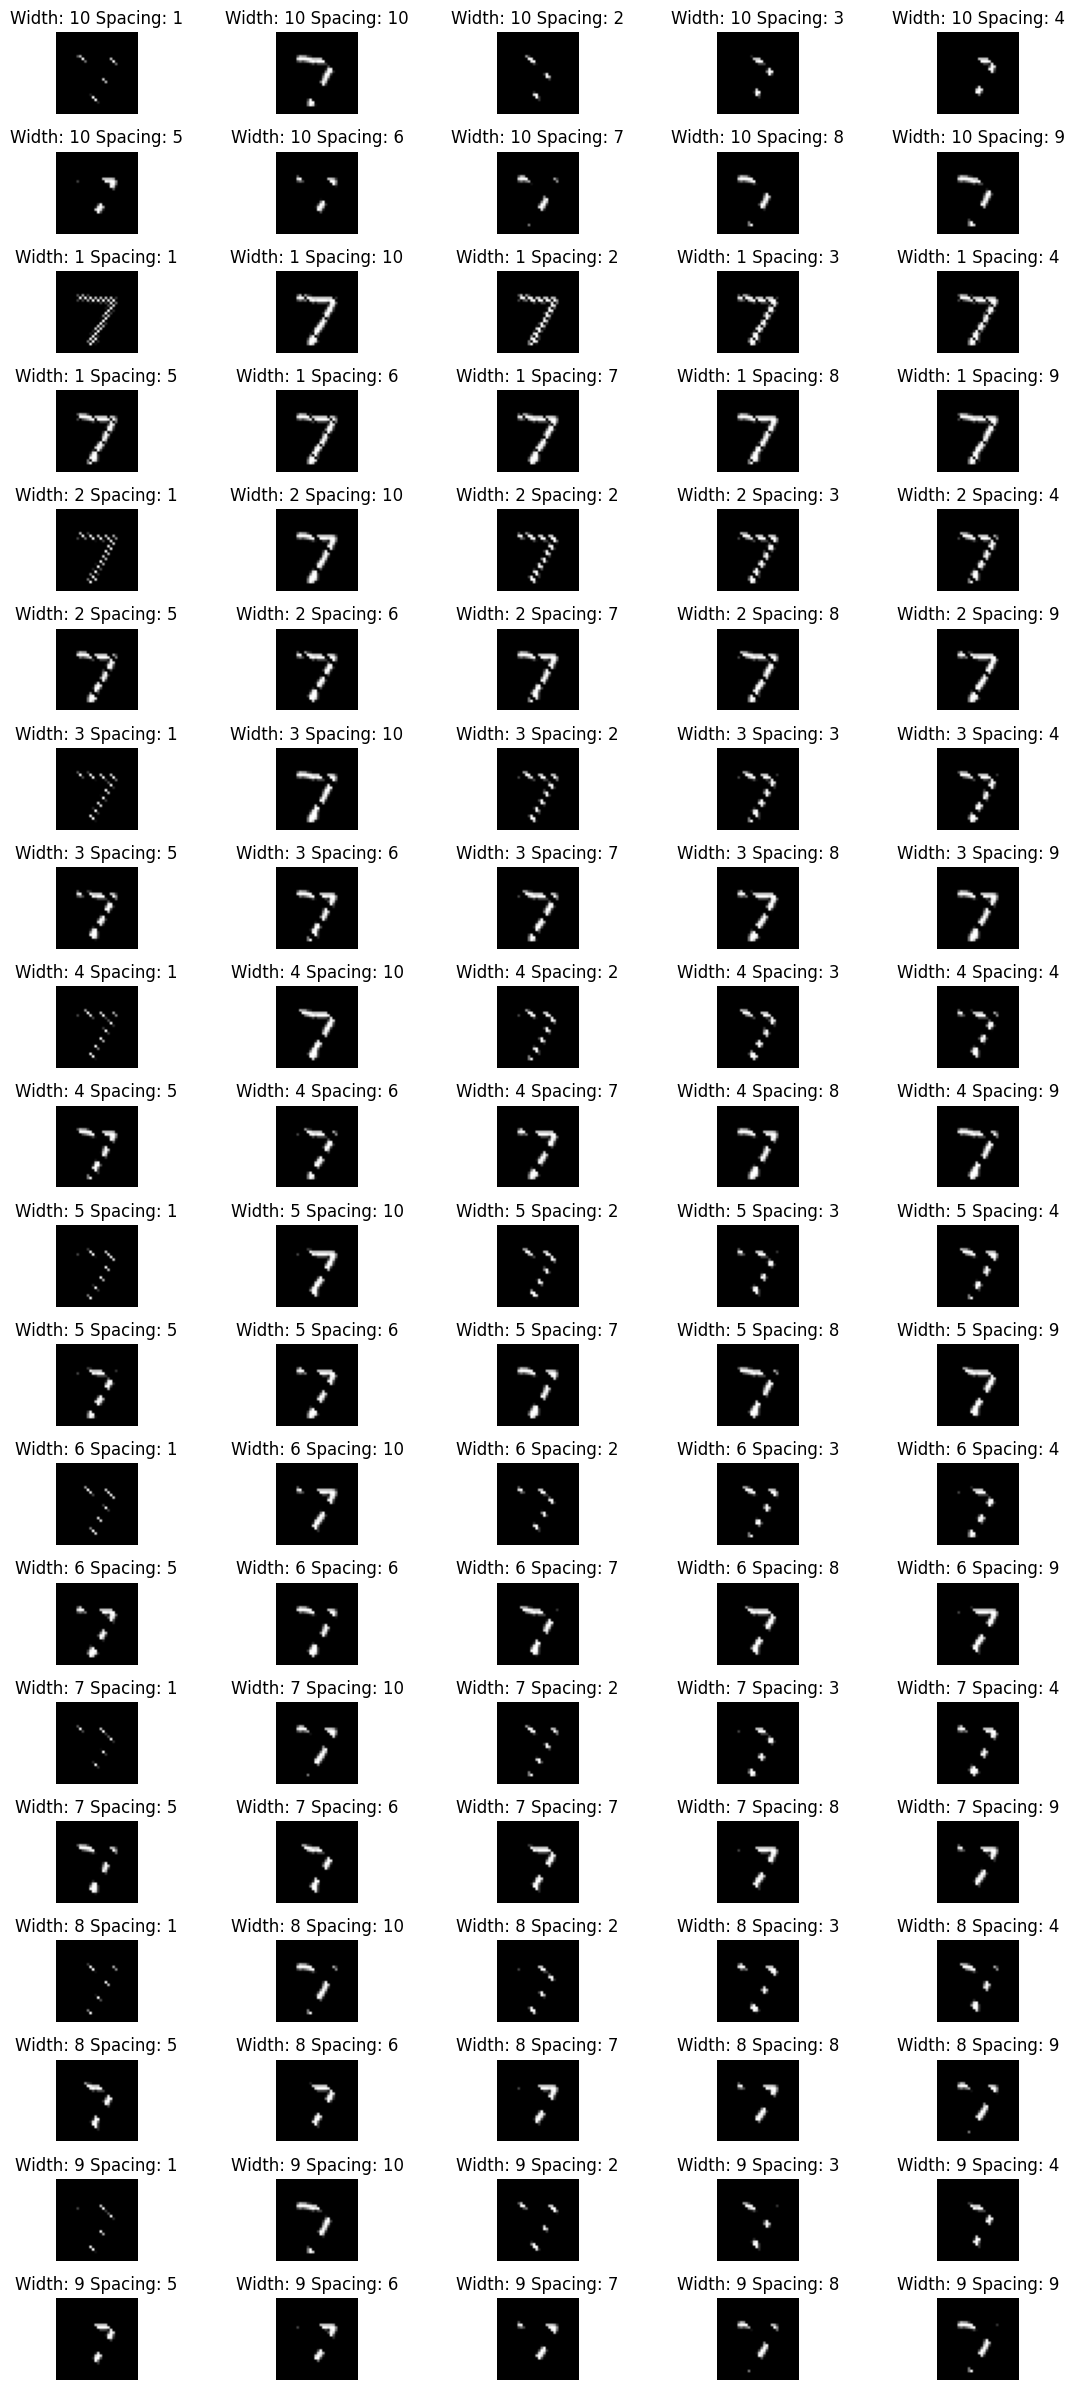

In [24]:
import torch
import os
import matplotlib.pyplot as plt

# Load and display images from all occluded MNIST datasets
save_dir = './occluded_datasets/'

# List all saved dataset files
dataset_files = [f for f in os.listdir(save_dir) if f.endswith('.pt')]

# Plotting the datasets
plt.figure(figsize=(12, 24))
num_images = len(dataset_files)
columns = 5
rows = (num_images + columns - 1) // columns  # Calculate number of rows based on number of datasets

for idx, dataset_file in enumerate(dataset_files):
    # Load the dataset
    dataset_path = os.path.join(save_dir, dataset_file)
    images, labels = torch.load(dataset_path)
    
    # Get the first image and label
    image = images[0].squeeze(0)  # Remove the channel dimension
    label = labels[0]
    
    # Plot the image
    ax = plt.subplot(rows, columns, idx + 1)
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Width: {dataset_file.split('_')[2]} Spacing: {dataset_file.split('_')[3].split('.')[0]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


C:\Users\Aneeqa\AppData\Local\Temp\ipykernel_34904\1804625740.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  images, labels = torch.load(dataset_path)


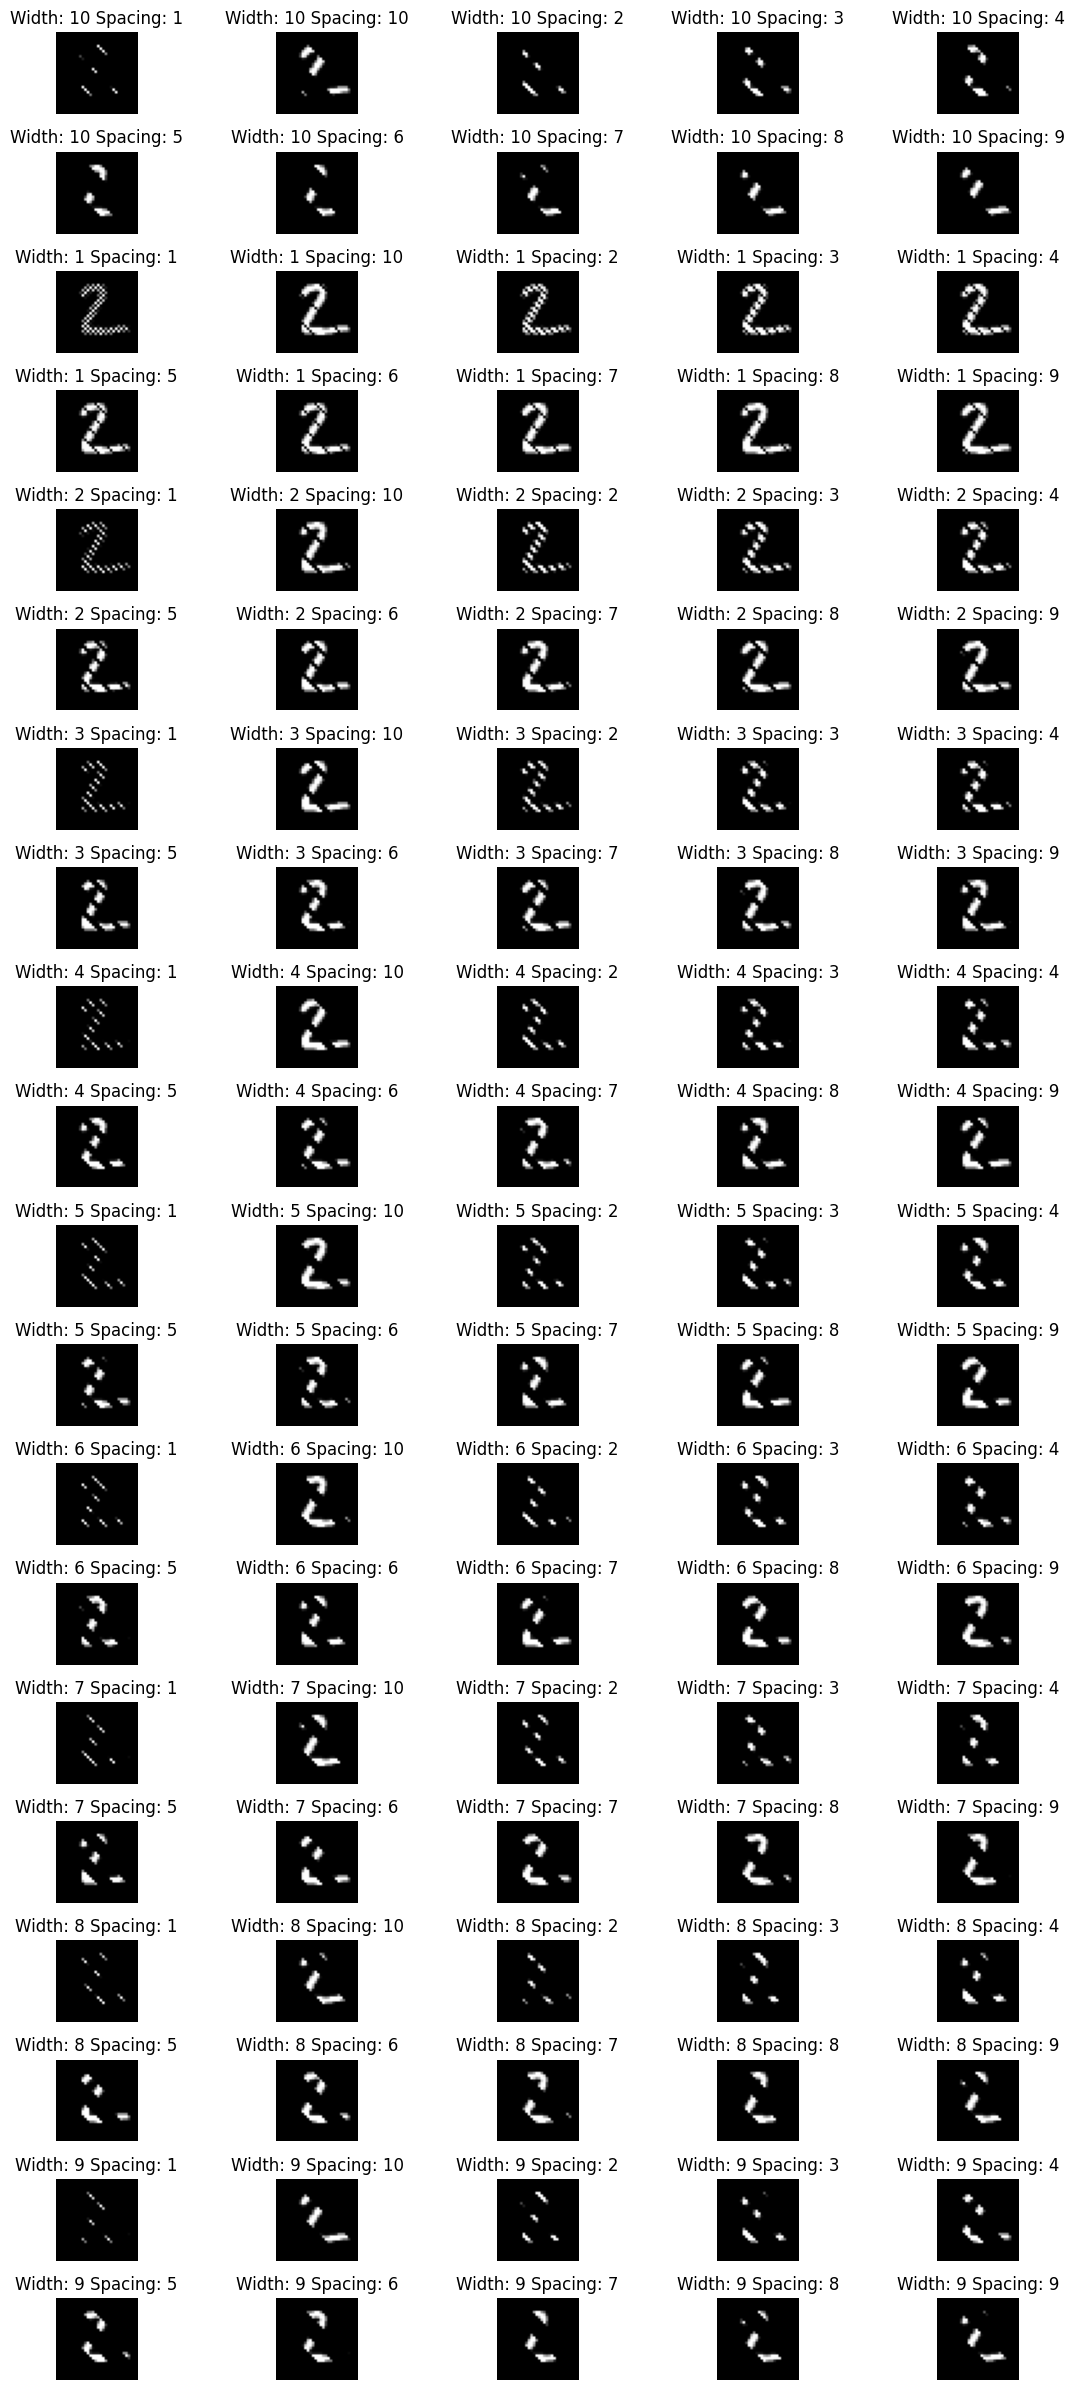

In [25]:
import torch
import os
import matplotlib.pyplot as plt

# Load and display images from all occluded MNIST datasets
save_dir = './occluded_datasets/'

# List all saved dataset files
dataset_files = [f for f in os.listdir(save_dir) if f.endswith('.pt')]

# Plotting the datasets
plt.figure(figsize=(12, 24))
num_images = len(dataset_files)
columns = 5
rows = (num_images + columns - 1) // columns  # Calculate number of rows based on number of datasets

for idx, dataset_file in enumerate(dataset_files):
    # Load the dataset
    dataset_path = os.path.join(save_dir, dataset_file)
    images, labels = torch.load(dataset_path)
    
    # Get the first image and label
    image = images[1].squeeze(0)  # Remove the channel dimension
    label = labels[0]
    
    # Plot the image
    ax = plt.subplot(rows, columns, idx + 1)
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Width: {dataset_file.split('_')[2]} Spacing: {dataset_file.split('_')[3].split('.')[0]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


C:\Users\Aneeqa\AppData\Local\Temp\ipykernel_34904\2330141108.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  images, labels = torch.load(dataset_path)


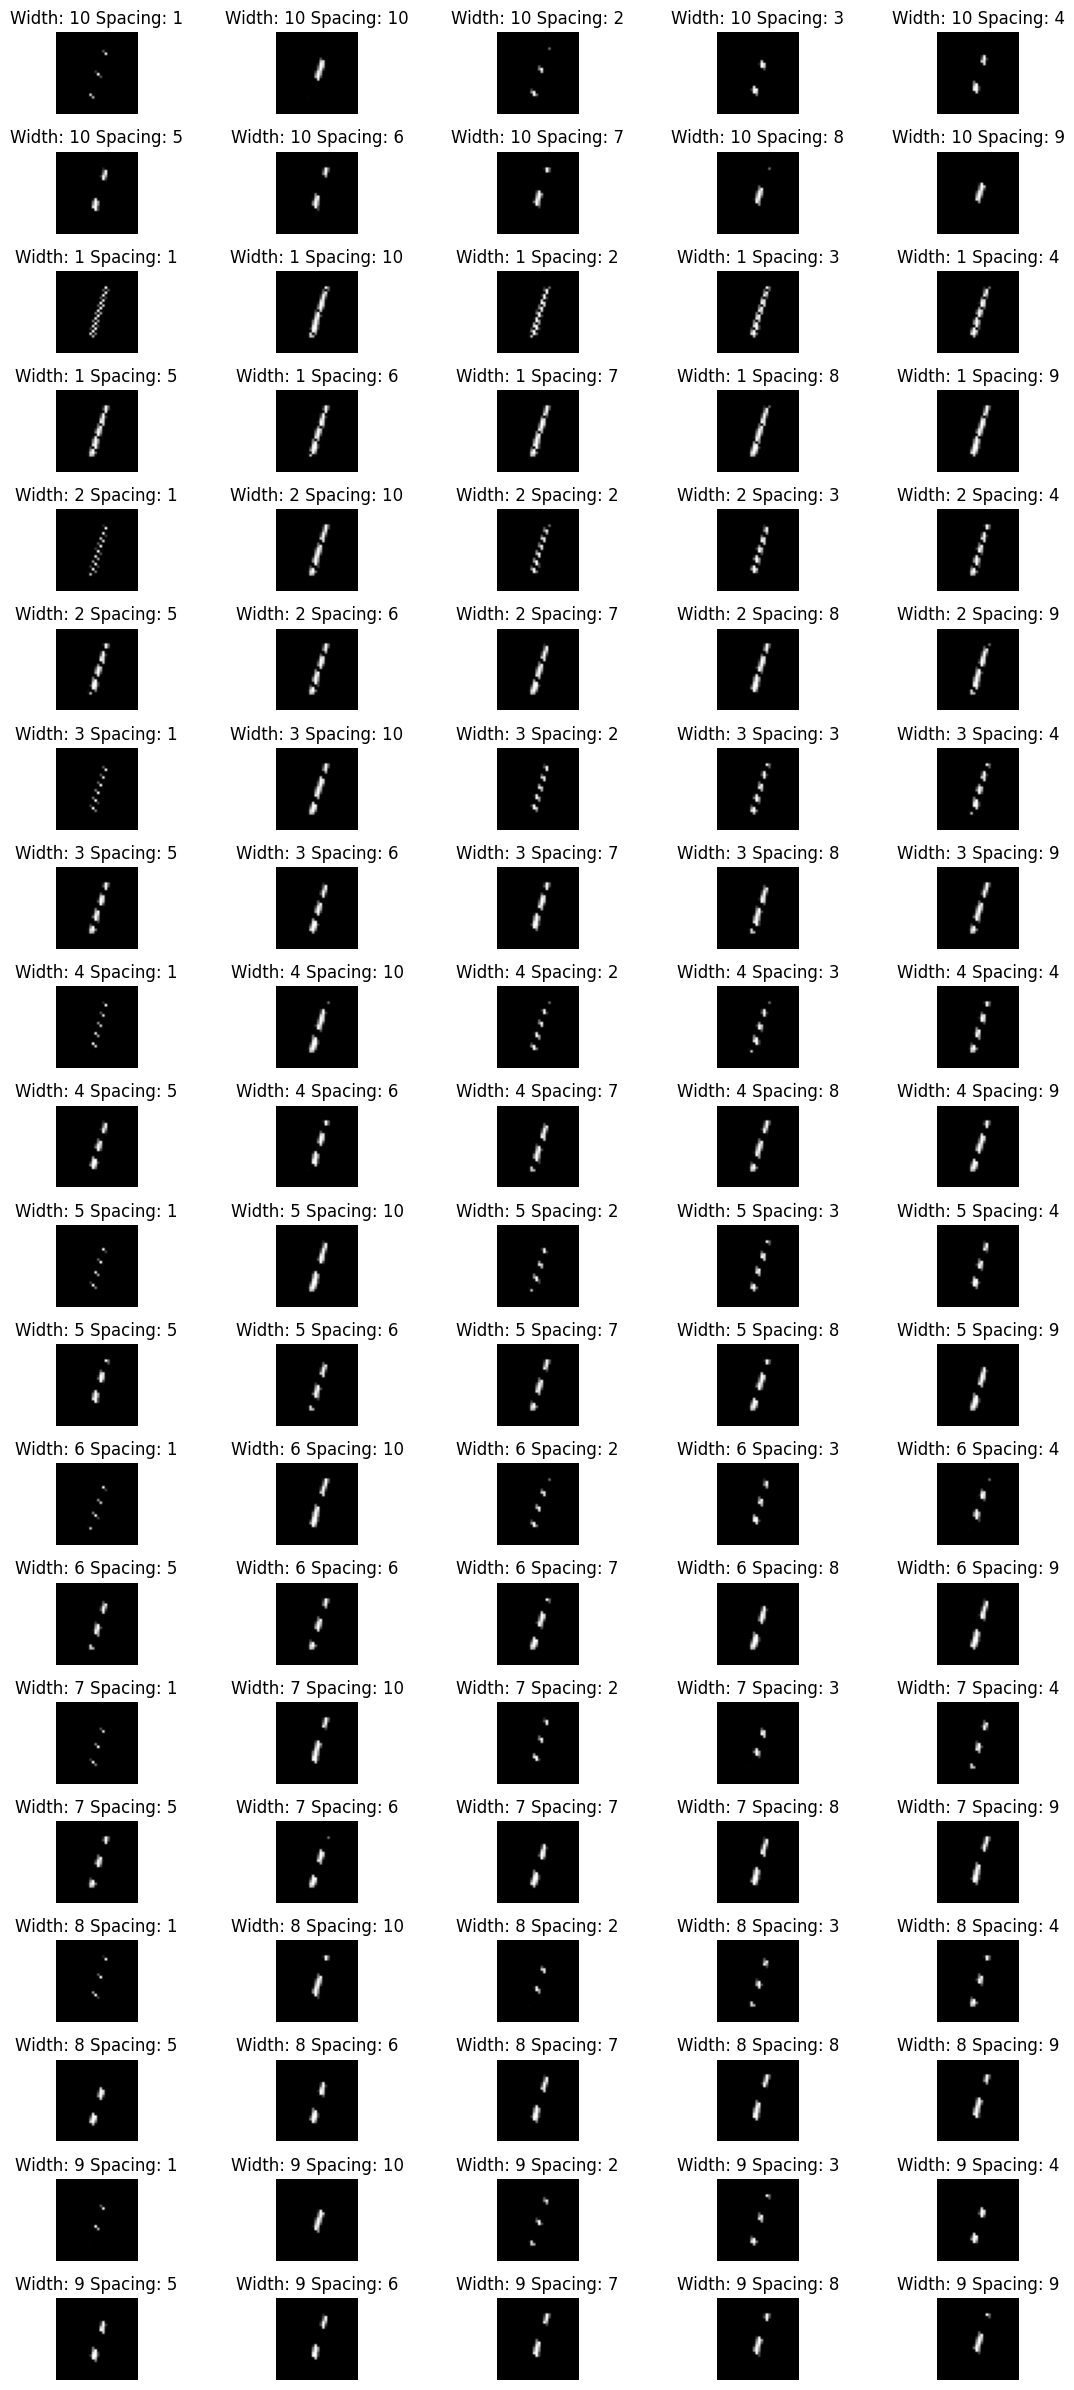

In [26]:
import torch
import os
import matplotlib.pyplot as plt

# Load and display images from all occluded MNIST datasets
save_dir = './occluded_datasets/'

# List all saved dataset files
dataset_files = [f for f in os.listdir(save_dir) if f.endswith('.pt')]

# Plotting the datasets
plt.figure(figsize=(12, 24))
num_images = len(dataset_files)
columns = 5
rows = (num_images + columns - 1) // columns  # Calculate number of rows based on number of datasets

for idx, dataset_file in enumerate(dataset_files):
    # Load the dataset
    dataset_path = os.path.join(save_dir, dataset_file)
    images, labels = torch.load(dataset_path)
    
    # Get the first image and label
    image = images[2].squeeze(0)  # Remove the channel dimension
    label = labels[0]
    
    # Plot the image
    ax = plt.subplot(rows, columns, idx + 1)
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Width: {dataset_file.split('_')[2]} Spacing: {dataset_file.split('_')[3].split('.')[0]}")
    ax.axis('off')

plt.tight_layout()
plt.show()
